## collect the pairs from huintaf and our colabfold

In [1]:
from pathlib import Path
from Bio import SeqIO
import pandas as pd

from ppi_utils.reduce import dedup_pairs
from ppi_utils.general import to_fasta, to_lines, get_ids
from ppi_utils.api import uniprot_api_fetch

In [2]:
ours = pd.read_csv('../our_scores.tsv', sep='\t', header=0)
ours.head()

,ida,idb,pdockq,dataset,prob,hash_A,hash_B,za,zb,da,db,zc,dc,capri
0,Q4VC12,Q9BWG6,0.338790,HuRI 1030,1,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639,6.533676,10.537396,0.591304,0.182609,6.533676,0.591304,acceptable
1,Q8N0S2,Q9BWG6,0.044733,HuRI 1030,1,CRC-001576EA78C61C85,CRC-12E45FF6696080F8,6.533676,8.990527,0.591304,0.307692,6.533676,0.591304,incorrect
2,P17568,Q9BWG6,0.051711,HuRI 1030,1,CRC-001576EA78C61C85,CRC-2743716544288776,6.533676,10.560456,0.591304,0.357664,6.533676,0.591304,incorrect
3,O95995,Q9BWG6,0.000000,HuRI 1030,1,CRC-001576EA78C61C85,CRC-2EDBC7981868EB12,6.533676,11.606744,0.591304,0.094142,6.533676,0.591304,incorrect
4,Q8IWZ5,Q9BWG6,0.000000,HuRI 1030,1,CRC-001576EA78C61C85,CRC-40897D5AF9B186A9,6.533676,9.997539,0.591304,0.304288,6.533676,0.591304,incorrect


In [3]:
mp = pd.read_csv('../huintaf_scores.tsv', sep='\t', header=0)
mp.head()

,ida,idb,pdockq,dataset,prob,hash_A,hash_B,za,zb,da,db,zc,dc,capri
0,O14964,A0A024R0Y4,0.077304,HuRI,1.0,CRC-DD64167A19DCF030,CRC-27D3F4F4D5EFF3C8,6.937132,11.84117,0.516088,0.158014,6.937132,0.516088,incorrect
1,O15287,A0A024R0Y4,0.038752,HuRI,1.0,CRC-4BC7475472AC3C84,CRC-27D3F4F4D5EFF3C8,11.711823,11.84117,0.127010,0.158014,11.711823,0.158014,incorrect
2,O60573,A0A024R0Y4,0.034888,HuRI,1.0,CRC-3D3075BFA48B3C12,CRC-27D3F4F4D5EFF3C8,9.707791,11.84117,0.334694,0.158014,9.707791,0.334694,incorrect
3,O75431,A0A024R0Y4,0.075548,HuRI,1.0,CRC-3A2EF476F1C78465,CRC-27D3F4F4D5EFF3C8,12.701179,11.84117,0.087452,0.158014,11.841170,0.158014,incorrect
4,O75528,A0A024R0Y4,0.730883,HuRI,1.0,CRC-C86153CFA83F9226,CRC-27D3F4F4D5EFF3C8,8.649690,11.84117,0.388889,0.158014,8.649690,0.388889,medium


In [4]:
r2k = pd.read_csv('../huintaf_r2k_scores.tsv', sep='\t', header=0)
r2k.head()

,ida,idb,pdockq,dataset,prob,hash_A,hash_B,za,zb,da,db,zc,dc,capri
0,O00139,P40429,0.041981,1849 random,0,CRC-A407D84B6BD04ACF,CRC-3E80D0AB77A0D406,9.698229,10.831108,0.264873,0.187192,9.698229,0.264873,incorrect
1,O00231,P31946,0.034794,1849 random,0,CRC-CE113054CBEBDB05,CRC-6BE1A9BF97468017,12.711342,12.238672,0.030806,0.069106,12.238672,0.069106,incorrect
2,O00231,Q06330,0.061639,1849 random,0,CRC-CE113054CBEBDB05,CRC-91E50D2DE9087EDA,12.711342,10.337528,0.030806,0.178000,10.337528,0.178000,incorrect
3,O00231,Q8N488,0.060234,1849 random,0,CRC-CE113054CBEBDB05,CRC-EB9593460A3F0F4C,12.711342,3.565209,0.030806,0.815789,3.565209,0.815789,incorrect
4,O00231,Q9NWR8,0.031359,1849 random,0,CRC-CE113054CBEBDB05,CRC-90C4BEBD5B1EFFD9,12.711342,10.542253,0.030806,0.202381,10.542253,0.202381,incorrect


In [5]:
pairs = pd.concat([_df[['hash_A', 'hash_B']] for _df in [ours, mp, r2k]])
len(pairs), len(pairs := dedup_pairs(pairs))

(68363, 67307)

In [6]:
pairs.head()

,hash_A,hash_B
0,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639
1,CRC-001576EA78C61C85,CRC-12E45FF6696080F8
2,CRC-001576EA78C61C85,CRC-2743716544288776
3,CRC-001576EA78C61C85,CRC-2EDBC7981868EB12
4,CRC-001576EA78C61C85,CRC-40897D5AF9B186A9


In [7]:
pairs.to_csv('test.tsv', sep='\t', header=False, index=False)

In [8]:
seqs = {r.id : str(r.seq) for r in SeqIO.parse('../uniprot/huintaf.hash.fasta', 'fasta')} | {r.id : r.seq for r in SeqIO.parse('../../ppi_data/v2.1/1:1_small/huri_test.fasta', 'fasta')}
len(seqs), next(iter(seqs.items()))

(9975,
 ('CRC-27D3F4F4D5EFF3C8',
  'MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCFTRGFEYKKHQSDHTYEIMTSDFPVLDPSWTAQEEMALLEAVMDCGFGNWQDVANQMCTKTKEECEKHYMKHFINNPLFASTLLNLKQAEEAKTADTAIPFHSTDDPPRPTFDSLLSRDMAGYMPARADFIEEFDNYAEWDLRDIDFVEDDSDILHALKMAVVDIYHSRLKERQRRKKIIRDHGLINLRKFQLMERRYPKEVQDLYETMRRFARIVGPVEHDKFIESHALEFELRREIKRLQEYRTAGITNFCSARTYDHLKKTREEERLKRTMLSEVLQYIQDSSACQQWLRRQADIDSGLSPSIPMASNSGRRSAPPLNLTGLPGTEKLNEKEKELCQMVRLVPGAYLEYKSALLNECNKQGGLRLAQARALIKIDVNKTRKIYDFLIREGYITKG'))

In [9]:
_ids = get_ids(pairs)
len(_ids), _ids - seqs.keys()

(9973, set())

In [15]:
with open('test.fasta', 'w') as fasta:
    for _id in sorted(seqs):
        to_fasta(_id, seqs[_id], fasta)

In [16]:
preds = pd.read_csv(
    'predict.tsv', sep='\t', header=None,
    names=['hash_A', 'hash_B', 'p_hat'])
preds.head()

,hash_A,hash_B,p_hat
0,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639,0.4120
1,CRC-001576EA78C61C85,CRC-12E45FF6696080F8,0.4734
2,CRC-001576EA78C61C85,CRC-2743716544288776,0.2539
3,CRC-001576EA78C61C85,CRC-2EDBC7981868EB12,0.8658
4,CRC-001576EA78C61C85,CRC-40897D5AF9B186A9,0.7002


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import matplotlib as mpl
from ppi_utils.general import to_lines
%matplotlib inline

In [18]:
# !mkdir -p plots

In [19]:
sns.set_theme(style='ticks')
mpl.rcParams['figure.facecolor'] = 'none'
mpl.rcParams['legend.frameon'] = False
h = 3  # plot height
capris = ['incorrect', 'acceptable', 'medium', 'high']
num_capris = ['$< 0.23$', '$0.23 - 0.5$', '$> 0.5$']

l, m, r = sns.color_palette('crest', 7)[0::3]
pal = [l, r]

In [20]:
aff = pd.concat((ours, mp, r2k))
aff.loc[(aff.dataset == 'HuRI 1030') & (aff.prob == 0), ['dataset', 'prob']] = '514 HuRI $-$', 0
aff.loc[(aff.dataset == 'HuRI 1030') & (aff.prob == 1), ['dataset', 'prob']] = '516 HuRI $+$', 1
aff.capri = pd.Categorical(aff.capri, capris[::-1][1:])
sets = ['516 HuRI $+$', '514 HuRI $-$', 'HuRI', 'hu.MAP', '1849 random']
aff.head()

,ida,idb,pdockq,dataset,prob,hash_A,hash_B,za,zb,da,db,zc,dc,capri
0,Q4VC12,Q9BWG6,0.338790,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639,6.533676,10.537396,0.591304,0.182609,6.533676,0.591304,acceptable
1,Q8N0S2,Q9BWG6,0.044733,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-12E45FF6696080F8,6.533676,8.990527,0.591304,0.307692,6.533676,0.591304,incorrect
2,P17568,Q9BWG6,0.051711,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-2743716544288776,6.533676,10.560456,0.591304,0.357664,6.533676,0.591304,incorrect
3,O95995,Q9BWG6,0.000000,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-2EDBC7981868EB12,6.533676,11.606744,0.591304,0.094142,6.533676,0.591304,incorrect
4,Q8IWZ5,Q9BWG6,0.000000,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-40897D5AF9B186A9,6.533676,9.997539,0.591304,0.304288,6.533676,0.591304,incorrect


In [21]:
merged = pd.merge(aff, preds, on=['hash_A', 'hash_B'])
merged.head()

,ida,idb,pdockq,dataset,prob,hash_A,hash_B,za,zb,da,db,zc,dc,capri,p_hat
0,Q4VC12,Q9BWG6,0.338790,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639,6.533676,10.537396,0.591304,0.182609,6.533676,0.591304,acceptable,0.4120
1,Q9BWG6,Q4VC12,0.232071,HuRI,1.0,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639,6.532676,10.538541,0.591304,0.182609,6.532676,0.591304,acceptable,0.4120
2,Q8N0S2,Q9BWG6,0.044733,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-12E45FF6696080F8,6.533676,8.990527,0.591304,0.307692,6.533676,0.591304,incorrect,0.4734
3,Q9BWG6,Q8N0S2,0.031530,HuRI,1.0,CRC-001576EA78C61C85,CRC-12E45FF6696080F8,6.532676,8.990527,0.591304,0.307692,6.532676,0.591304,incorrect,0.4734
4,P17568,Q9BWG6,0.051711,516 HuRI $+$,1.0,CRC-001576EA78C61C85,CRC-2743716544288776,6.533676,10.560456,0.591304,0.357664,6.533676,0.591304,incorrect,0.2539


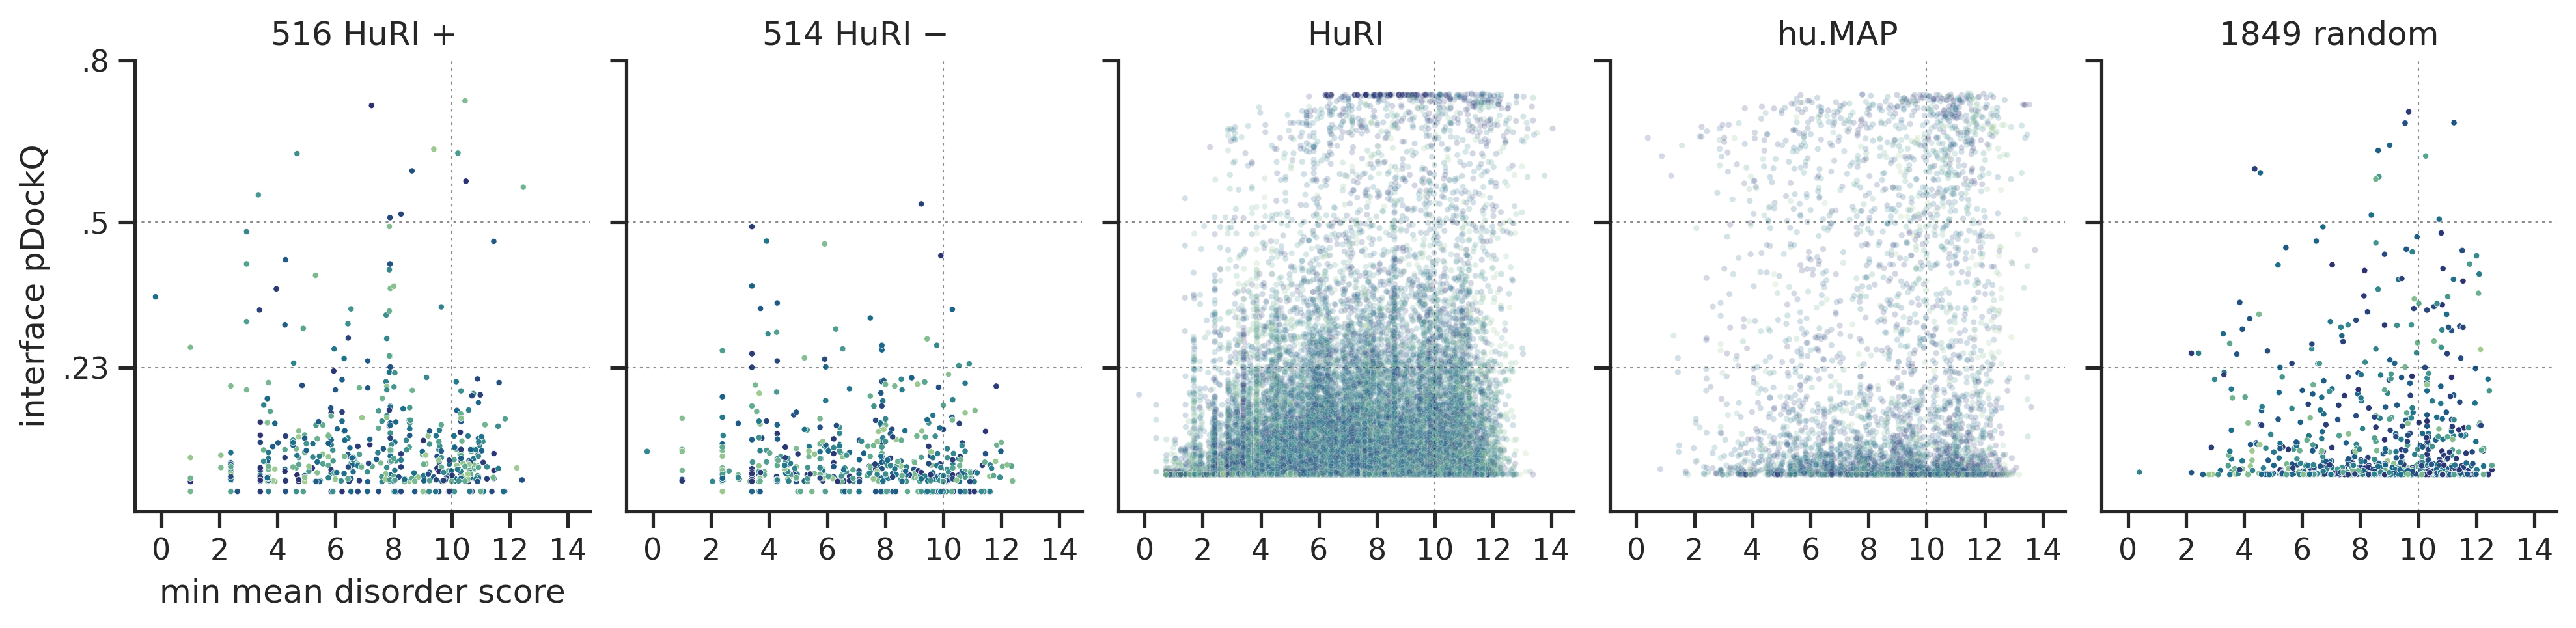

In [22]:
from matplotlib.ticker import MaxNLocator

with mpl.rc_context({'figure.dpi': 300}):
    fig, axes = plt.subplots(nrows=1, ncols=len(sets),
                             figsize=(3.2 * len(sets), 3),
                             sharex=True, sharey=True)
    shrink = ['HuRI', 'hu.MAP']
    for j, (_set, ax) in enumerate(zip(sets, axes)):
        df = merged.loc[merged.dataset == _set]
        sn = sns.scatterplot(
            data=df,
            y='pdockq',
            x='zc',
            hue='p_hat', palette='crest', hue_norm=(0, 1),
            s=5,
            alpha=1 if _set not in shrink else .2,
            ax=ax,
            legend=False,
            rasterized=_set in shrink,
        )
        ax.set(title=_set, yticks=[.23, .5, .8], yticklabels=['.23', '.5', '.8'], ylabel=None, xlabel=None)
        for l in [.23, .5]:
            kw = dict(dashes=(2, 3), c='.1', lw=.5, alpha=.5, zorder=99)
            ax.axhline(y=l, **kw)
        ax.axvline(x=10, **kw)
        if not j:
            ax.set(xlabel='min mean disorder score', ylabel='interface pDockQ')
        # rho = spearmanr(df.pdockq, df.p_hat)[0]
        # ax.text(.04, .95, f'$r = {rho:.2f}$', ha='left', va='top', fontsize='small', transform=ax.transAxes)
        # if _set == 'hu.MAP':
        #     rho = spearmanr(df.pdockq, df.prob)[0]
        #     ax.text(.04, .01, f'Spearman\'s $r = {rho:.2f}$', ha='left', va='bottom', fontsize='xx-small', transform=ax.transAxes)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.subplots_adjust(wspace=.08)
    sns.despine()
    fig.savefig('chezod_s23acc.pdf')

In [23]:
ou = pd.merge(ours, preds, on=['hash_A', 'hash_B'])
ou.head()

,ida,idb,pdockq,dataset,prob,hash_A,hash_B,za,zb,da,db,zc,dc,capri,p_hat
0,Q4VC12,Q9BWG6,0.338790,HuRI 1030,1,CRC-001576EA78C61C85,CRC-045C9C9CAE0FD639,6.533676,10.537396,0.591304,0.182609,6.533676,0.591304,acceptable,0.4120
1,Q8N0S2,Q9BWG6,0.044733,HuRI 1030,1,CRC-001576EA78C61C85,CRC-12E45FF6696080F8,6.533676,8.990527,0.591304,0.307692,6.533676,0.591304,incorrect,0.4734
2,P17568,Q9BWG6,0.051711,HuRI 1030,1,CRC-001576EA78C61C85,CRC-2743716544288776,6.533676,10.560456,0.591304,0.357664,6.533676,0.591304,incorrect,0.2539
3,O95995,Q9BWG6,0.000000,HuRI 1030,1,CRC-001576EA78C61C85,CRC-2EDBC7981868EB12,6.533676,11.606744,0.591304,0.094142,6.533676,0.591304,incorrect,0.8658
4,Q8IWZ5,Q9BWG6,0.000000,HuRI 1030,1,CRC-001576EA78C61C85,CRC-40897D5AF9B186A9,6.533676,9.997539,0.591304,0.304288,6.533676,0.591304,incorrect,0.7002


In [24]:
spearmanr(ou.prob, ou.p_hat)

SignificanceResult(statistic=0.025743281073201923, pvalue=0.40918514108291093)

In [25]:
from ppi_utils.pairs import make_c_classes
from ppi_utils.reduce import shrink_files_both_ways

In [31]:
shrink_files_both_ways('../our_scores.tsv', 'test.fasta', 'sc.tsv', 'sc.fasta')

dropped 360/399 table IDs and 1026/1030 rows, and 9967/9975 sequence IDs


In [29]:
oo = make_c_classes('../our_scores.tsv', 'test_c3.fasta', 'test.fasta')

AssertionError: The IDs in test.fasta and ../our_scores.tsv should be the same! Did you forget "shrink_files_both_ways" after the redundancy reduction?